In [1]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams['legend.frameon'] = False
mpl.rcParams['legend.fontsize'] = 'xx-large'
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['figure.figsize'] = (10, 7)

In [2]:
import umodel as unf

In [3]:
# Observed yields
d = np.array([ 90, 110])
D = np.array([170,  30])

# Response matrix
r = np.diag([1, 1])
R = np.diag([1, 1])

# Tested truth bin content
b = np.array([ 90, 110])
B = np.array([170,  30])

# Correlation matrix
corr = np.diag([1, 1, 1, 1])

# Test the function
m = unf.model(d, D, r, R, corr)
print(m.NLL(b, B))

0.0


In [4]:
truthBins = np.random.random(size=(1000, 4)) * 200
NLLs = [m.NLL(b[0:2], b[2:]) for b in truthBins]

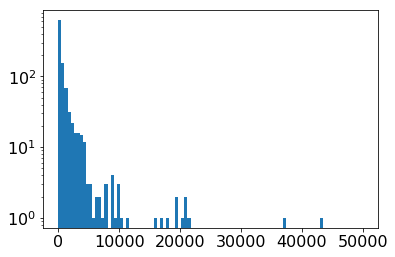

In [5]:
plt.hist(NLLs, bins=np.linspace(0, 50000, 100), log=True);

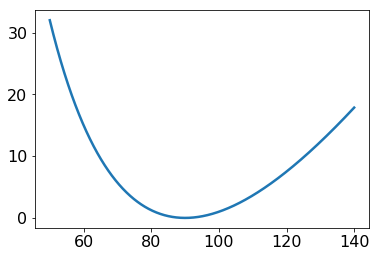

In [6]:
b1Scan = np.linspace(50, 140, 1000)
NLLs = [m.NLL(np.array([b1, 110]), np.array([170, 30])) for b1 in b1Scan]
plt.plot(b1Scan, NLLs);

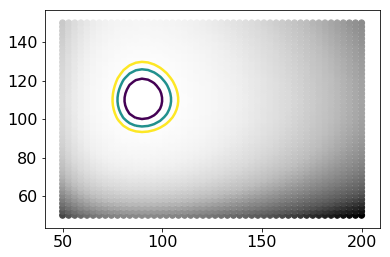

In [7]:
# Observed yields
d = np.array([ 90, 110])
D = np.array([170,  30])

# Response matrix
r = np.diag([1, 1])
R = np.diag([1, 1])

# Tested truth bin content
b = np.array([ 90, 110])
B = np.array([170,  30])

# Correlation matrix
corr = np.diag([1, 1, 1, 1])

# Test the function
m = unf.model(d, D, r, R, corr)


# 2D scan of first 2 first bins
b1s = np.linspace(50, 200, 50)
b2s = np.linspace(50, 150, 50)

# Plotting of 1/2/3-sigma contour
points = np.array(np.meshgrid(b1s, b2s)).T.reshape(-1, 2)
Xs, Ys = points[:, 0], points[:, 1]
NLLs = np.array([m.NLL(np.array([b1, b2]), np.array([170, 30])) for b1, b2 in zip(Xs, Ys)])        
XX, YY = np.meshgrid(b1s, b2s)
nn = NLLs.reshape(len(b1s), len(b2s)).T
ref = nn.min()
plt.contour(XX, YY, nn, levels=[ref+1, ref+2, ref+3])
plt.scatter(Xs, Ys, c=NLLs, cmap='Greys');

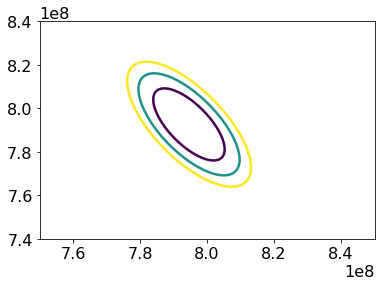

In [8]:
# Observed yields
d = np.array([ 24636.523496581398, 14878.040254917081, 14890.266212322726, 24652.683463182377])
D = np.array([ 24659.23571036971, 14874.62653317551, 14828.540341379041, 24695.110842079284 ])

# Response matrix
r = np.array([
    [ 1.891022879949602e-05, 4.27949708094587e-06, 2.241322476197443e-06, 4.127351215117905e-06 ],
    [ 5.307771667060071e-06, 8.03574122224043e-06, 4.181443309378539e-06, 2.670984389980063e-06 ],
    [ 2.681632337210782e-06, 4.18181658103819e-06, 8.073637985764411e-06, 5.312662218228923e-06 ],
    [ 4.126559922165243e-06, 2.25902597768202e-06, 4.275620447085394e-06, 1.893211626936133e-05 ],
])

R = np.array([
    [ 1.89057527947717e-05, 4.236538496210918e-06, 2.245997918834765e-06, 4.143403053537583e-06 ],
    [ 5.34828656173058e-06, 8.088569986431556e-06, 4.157881897814714e-06, 2.684560674734903e-06 ],
    [ 2.69424628872622e-06, 4.176357847462045e-06, 8.054020078883517e-06, 5.333669088472362e-06 ], 
    [ 4.09911187449855e-06, 2.252559562606424e-06, 4.238418098183349e-06, 1.893191218541362e-05 ],
])

# Correlation matrix
corr = np.diag([1]*8)

# Create the model
m = unf.model(d, D, r, R, corr)

# Tested truth bin content
bref = m.b1
Bref = m.b2

# 2D scan of first 2 first bins
b1s = np.linspace(0.75e9, 0.85e9, 100)
b2s = np.linspace(0.74e9, 0.84e9, 100)

# Plotting of 1/2/3-sigma contour
points = np.array(np.meshgrid(b1s, b2s)).T.reshape(-1, 2)
Xs, Ys = points[:, 0], points[:, 1]
NLLs = np.array([m.NLL(np.array([b1, b2, bref[2], bref[3]]), Bref) for b1, b2 in zip(Xs, Ys)])        
XX, YY = np.meshgrid(b1s, b2s)
nn = NLLs.reshape(len(b1s), len(b2s)).T
ref = nn.min()
plt.contour(XX, YY, nn, levels=[ref+1, ref+2, ref+3]);

In [9]:
# Perform unfolding by NLL minimzation
bunf, Bunf, nllMin = m.unfold()
print(bunf)
print(Bunf)
print(nllMin)

[7.94558444e+08 7.92562301e+08 7.92354207e+08 7.94778021e+08]
[7.94973897e+08 7.92206249e+08 7.92138404e+08 7.94926765e+08]
9.807619578701397e-28


C:\Users\Romain\Anaconda3\lib\site-packages\scipy\optimize\_minimize.py:518: RuntimeWarning: Method Powell cannot handle constraints nor bounds.
  RuntimeWarning)


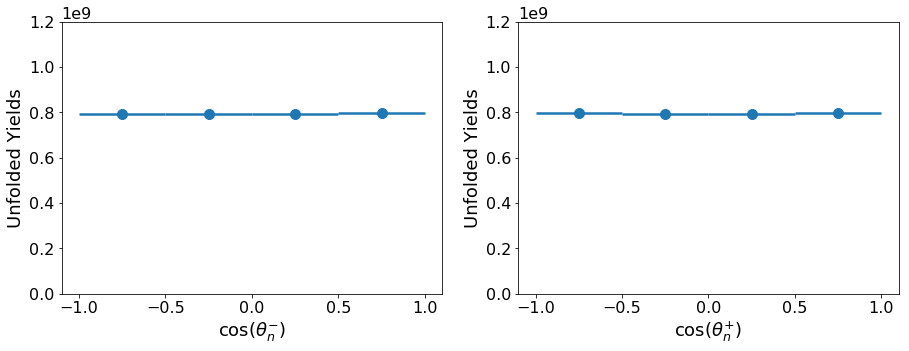

In [10]:
# Plot the result
plt.figure(figsize=(15, 5))

# Binned-like plotting
xEdges = np.array([-1.0, -0.5, 0, 0.5, 1.0])
xUp, xDown = xEdges[1:], xEdges[:-1]
xCenter = (xUp + xDown) / 2

# First observable
plt.subplot(1, 2, 1)
plt.plot(xCenter, bunf, 'o', markersize=10)
plt.hlines(y=bunf, xmin=xDown, xmax=xUp, color='tab:blue')
plt.ylabel('Unfolded Yields')
plt.xlabel('cos($\\theta^{-}_{n}$)')
plt.ylim(0, 1.2e9)

# Second observable
plt.subplot(1, 2, 2)
plt.plot(xCenter, Bunf, 'o', markersize=10)
plt.hlines(y=Bunf, xmin=xDown, xmax=xUp, color='tab:blue')
plt.xlabel('cos($\\theta^{+}_{n}$)')
plt.ylabel('Unfolded Yields')
plt.ylim(0, 1.2e9);

In [11]:
val, nll = m.profilePOI(iPOI=0, POImin=0.74e9, POImax=0.85e9, nScan=30)

794504504.5045044
6.788648738424117e-05


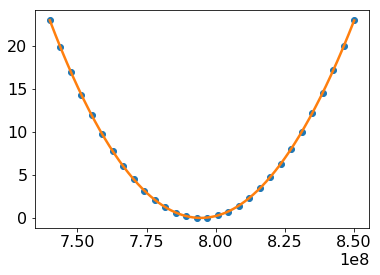

In [12]:
from scipy import optimize

def f(x, a0, a1, a2, a3):
    return a0 + a1*x + a2*x**2 + a3*x**3

p, cov = optimize.curve_fit(f, val, nll)
plt.plot(val, nll, 'o')

v = np.linspace(val.min(), val.max(), 1000)
n = f(v, *p)
plt.plot(v, n);

iM = np.argmin(n)
print(v[iM])

# Comparing with direct unfolding
b1, b2, _ = m.unfold()
print((b1[0]-v[iM])/b1[0])

In [13]:
postFitPOIs = m.postFitUncerPOIs()

In [14]:
for m1, m2 in zip(postFitPOIs, np.concatenate([b1, b2])):
    print((m1[0] - m2)/m1[0])

0.00030021014710292156
0.00030021014710299973
0.0003002101471029425
0.000300210147102918
0.0003002101471030608
0.00030021014710286307
0.0003002101471030506
0.0003002101471030127


In [15]:
def plotResult(xEdges, postFitPOIs):
    
    '''
    This function plot the post-fit unfolded bins 
    versus the unfolded observables values.
    
    xEdges: 1D array with edges of observable values
    postFitPOIs: 2D array of shape (N, 3) with N POI measurment
                 with central value, negative and positive error.
    '''
    
    # Plot the result
    plt.figure(figsize=(15, 5))

    # x-data for binned-like plotting
    xUp, xDown = xEdges[1:], xEdges[:-1]
    xCenter = (xUp + xDown) / 2

    # y-data
    vals = postFitPOIs[:, 0]
    errn = postFitPOIs[:, 1]
    errp = postFitPOIs[:, 2]

    # First observable
    plt.subplot(1, 2, 1)
    vals1 = vals[:m.N1]
    errn1, errp1 = errn[:m.N1], errp[:m.N1]
    plt.plot(xCenter, vals1, 'o', markersize=10)
    plt.hlines(y=vals1, xmin=xDown, xmax=xUp, color='tab:blue')
    plt.vlines(x=xCenter, ymin=vals1-errn1, ymax=vals1+errp1, color='tab:blue')
    plt.ylabel('Unfolded Yields')
    plt.xlabel('cos($\\theta^{-}_{n}$)')
    plt.ylim(7e8, 9e8)

    # Second observable
    plt.subplot(1, 2, 2)
    vals2 = vals[m.N1:]
    errn2, errp2 = errn[m.N1:], errp[m.N1:]
    plt.plot(xCenter, vals2, 'o', markersize=10)
    plt.hlines(y=vals2, xmin=xDown, xmax=xUp, color='tab:blue')
    plt.vlines(x=xCenter, ymin=vals2-errn2, ymax=vals2+errp2, color='tab:blue')
    plt.xlabel('cos($\\theta^{+}_{n}$)')
    plt.ylabel('Unfolded Yields')
    plt.ylim(7e8, 9e8);

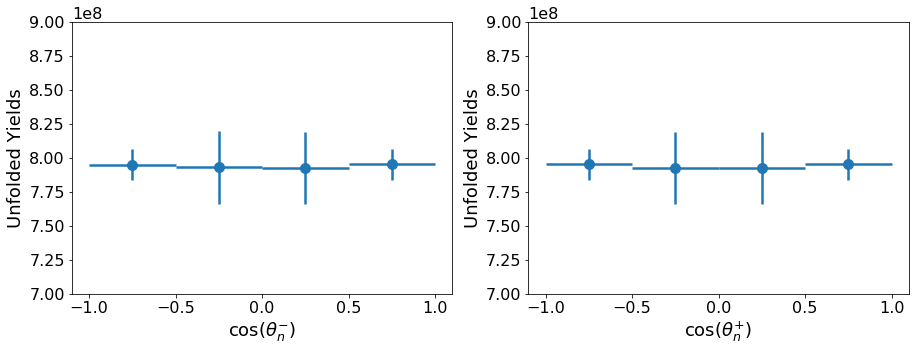

In [17]:
Xs = np.array([-1.0, -0.5, 0, 0.5, 1.0])
plotResult(Xs, postFitPOIs)